In [1]:
%matplotlib inline

# Nilearn visualization tool of brain images

## Link to the tutorial
https://github.com/darya-chyzhyk/Tutorial_BrainHack_Paris_2017


## Example of the visualization
http://nilearn.github.io/auto_examples/index.html


## New release of Nilearn 0.3.0 beta
To install the beta version, use:

$ pip install --upgrade --pre nilearn







In [2]:
# Lets check the Nilearn version
# new version is 0.3.0b1
import nilearn
print(nilearn.__version__)

0.3.0b1


In [3]:
print(nilearn.__path__)

['/home/darya/anaconda2/lib/python2.7/site-packages/nilearn']


## Outline
Plotting tools from Nilearn for an **easy visualization** of **neuroimaging data** and **statistical analysis results**.

- **`plotting.plot_anat`**

- **`plotting.plot_epi`**

- **`plotting.plot_stat_map`**

- **`plotting.plot_glass_brain`**

- **`plotting.plot_roi`**

- **`plotting.plot_connectome`**

## Plotting files and in-memory objects

Plot any human brain image in standard Nifti files (`.nii`, `.nii.gz`).

Like all nilearn functions, an image can be a:
- filename (`String`)
- in-memory nifti image.

## Few conventions

* Nilearn plotting tools by default uses standard anatomical **Montreal Neurological Image (MNI)** template brain image as a background, **same template as used in SPM & FSL software**.

To be well overlay on any mask image or statistical map, the image should be realigned to MNI space. One easy identification whether image is in MNI space or not, is to check the coordinates of (x, y, z) = (0, 0, 0) to be aligned with the anterior / posterior commissural line (AC/PC line) as shown in below demonstration.

* Nilearn **does not provide interactive visualization** of functional images (3D + t) like in other softwares.

- # Plotting Anatomical images `plot_anat`

We show here how to plot anatomical image using tool: `plotting.plot_anat`

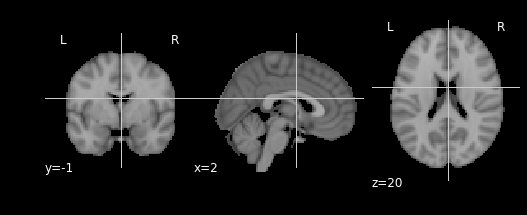

In [5]:
# First, we fetch and load the default anatomical image available in Nilearn datasets module
from nilearn import datasets

# default MNI152 template
anatomical_image = datasets.load_mni152_template()

# Then, import plotting module from nilearn to easily visualize the loaded image
from nilearn import plotting

# To plot anatomical image
plotting.plot_anat(anatomical_image)

- We can control a bit more the details.

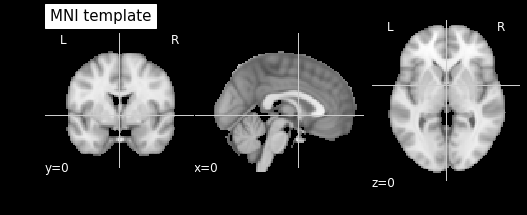

In [8]:
# We can control a bit more the details
plotting.plot_anat(anatomical_image, cut_coords=[0, 0, 0], title='MNI template')

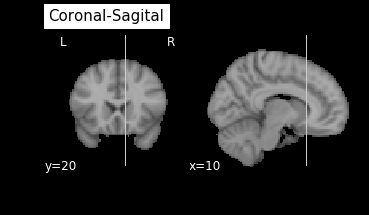

In [6]:
# We candisplay different modes 
# Choosing the direction of the cuts: 'x' - sagittal, 'y' - coronal, 'z' - axial, 
#'ortho' - three cuts are performed in orthogonal directions.

# Try to plot Coronal-Sagital view

# plotting.plot_anat(anatomical_image, cut_coords=[numbers here], display_mode='something here', title='Coronal-Sagital')

- # Plotting raw functional images `plot_epi`

We show here, how to plot raw functional brain images using tool: `plotting.plot_epi`.

First, we **fetch and load the functional images** available in Nilearn datasets module.

No need to import again since we imported datasets module on top.


In [16]:
# First, we fetch and load the functional images available in Nilearn datasets module
# No need to import again since we imported datasets module on top

# Loading functional images of only one subject
data = datasets.fetch_haxby(subjects=1)

# Raw functional image filename
functional_filename = data.func[0] # path of the single subject image with .nii.gz
print(functional_filename)


Dataset created in /home/darya/nilearn_data/haxby2001



Downloaded 2969 of 2969 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 408 of 408 bytes (100.0%,    0.0s remaining) ...done. (0 seconds, 0 min)


Downloaded 314803244 of 314803244 bytes (100.0%,    0.0s remaining) ...done. (45 seconds, 0 min)
Extracting data from /home/darya/nilearn_data/haxby2001/e55ccad24e48bcce63c6a2ea0eb83b59/subj1-2010.01.14.tar.gz...

/home/darya/nilearn_data/haxby2001/subj1/bold.nii.gz


.. done.


In [10]:
# Is it a 4D image?
from nilearn import image
print(image.load_img(functional_filename).shape)

(40, 64, 64, 1452)


We compute the **mean of the image** from (x, y, z, t) bold image to (x, y, z), averaging in time domain.

Then we **visualize** the mean image.


In [13]:
# We compute the mean of the image from (x, y, z, t) bold image to (x, y, z), averaging in time domain
from nilearn.image import mean_img

mean_functional_image = mean_img(functional_filename)

print(image.load_img(mean_functional_image).shape)

(40, 64, 64)


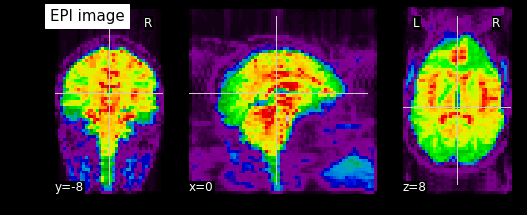

In [14]:
# Visualizing mean of the single functional image
plotting.plot_epi(mean_functional_image, title='EPI image')

**Note:** By default, the coordinates in three directional mode 'x', 'y', 'z' are chosen automatically no need of explicitly specifying them.

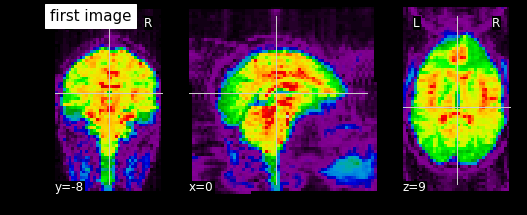

In [12]:
# Visualizing of the first functional image

first_functional_image = image.index_img(functional_filename, 0)
plotting.plot_epi(first_functional_image, title='first image')

- # Plotting Statistical images `plot_stat_map`

In this section, we show how to use `plotting.plot_stat_map` to visualize statistical results overlayed onto aligned to specific anatomical images or default MNI template. Most suitable images are Z-map, T-map, ICA statistical maps.

In this setting, we show the t-contrast maps obtained from task fMRI datasets during a left vs right button press on its own subject specific anatomical image.

In [17]:
# Fetch t-contrasts maps from Nilearn datasets module
localizer_dataset = datasets.fetch_localizer_button_task(
    n_subjects=2,
    get_anats=True)
# Anatomical image filename
localizer_anat_filename = localizer_dataset.anats[1]
print(localizer_anat_filename)
# T-contrast map filename
localizer_tmap_filename = localizer_dataset.tmaps[1]
print(localizer_tmap_filename)

/home/darya/nilearn_data/brainomics_localizer/brainomics_data/S02/normalized_T1_anat_defaced.nii.gz
/home/darya/nilearn_data/brainomics_localizer/brainomics_data/S02/t_map_left_auditory_&_visual_click_vs_right_auditory&visual_click.nii.gz



We want to **visualize statistical t-map** on its **anatomical image**.

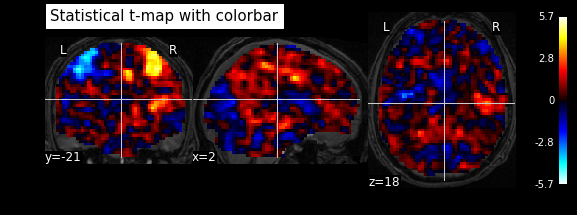

In [16]:
# Visualize statistical t-map on its anatomical image

plotting.plot_stat_map(localizer_tmap_filename, bg_img=localizer_anat_filename,
                       title="Statistical t-map with colorbar")

We focus on **changing some interesting parameters** like :
- Colorbar


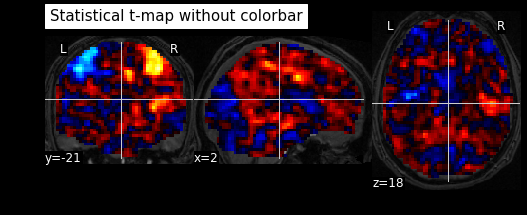

In [15]:
# We focus on changing some interesting parameters

# Visualize statistical t-map on its anatomical image with colorbar
# (default True)
plotting.plot_stat_map(localizer_tmap_filename, bg_img=localizer_anat_filename,
                       title="Statistical t-map without colorbar", colorbar=False)

- Threshold

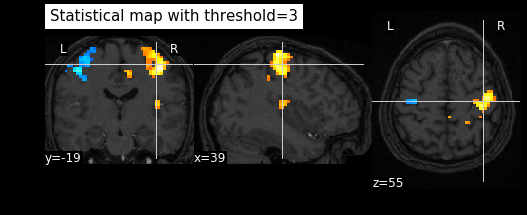

In [16]:
# Visualizing t-map with `threshold=3` based on its statistical intensities
plotting.plot_stat_map(localizer_tmap_filename, bg_img=localizer_anat_filename,
                       threshold=3, colorbar=False,
                       title="Statistical map with threshold=3")

- Contrast

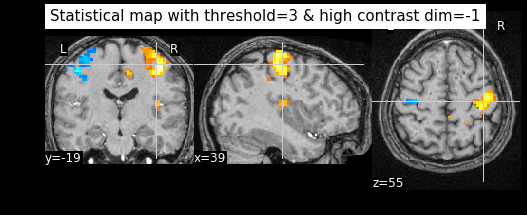

In [17]:
# Visualizing t-map with `threshold=3` and with high contrast dim=-1
# Dimming factor applied to background image intensity. -1 = increase constrast; 1 = decrease contrast.
plotting.plot_stat_map(localizer_tmap_filename, bg_img=localizer_anat_filename,
                       threshold=3, colorbar=False, dim=-1,
                       title="Statistical map with threshold=3 & high contrast dim=-1")

- # Plotting statistical maps with glass brain image `plot_glass_brain`

In this setting, we show the t-contrast maps obtained from task fMRI datasets during a left vs right button press overlayed on cool glass brain schematics image. `plotting.plot_glass_brain` will be used here.

**Note:** Here, background image is not needed since background image is always brain schematic image and statistical map should be normalized to MNI brain space to be aligned properly.

- Visualizing **t-map** with **glass brain as background image**.


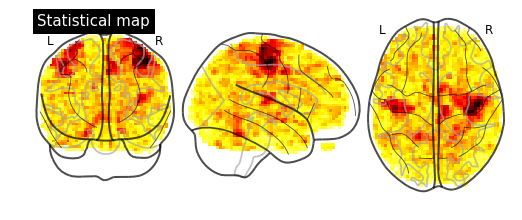

In [19]:
# Visualizing t-map with glass brain as background image
plotting.plot_glass_brain(localizer_tmap_filename, title="Statistical map")

- With **colorbar**

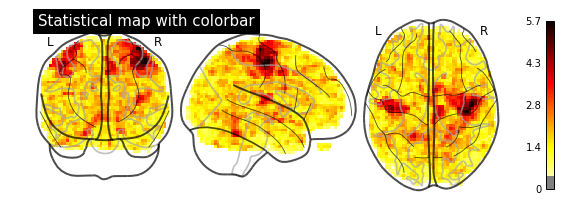

In [20]:
# Visualizing t-map with glass brain as background image
plotting.plot_glass_brain(localizer_tmap_filename, colorbar=True,
                          title="Statistical map with colorbar")

- With **threshold**.

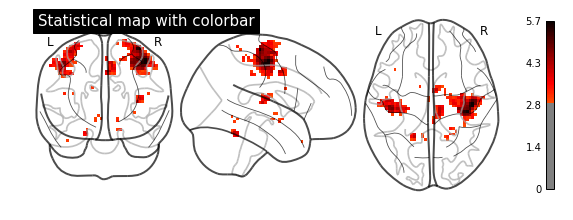

In [24]:
plotting.plot_glass_brain(localizer_tmap_filename, threshold=3, colorbar=True,
                          title="Statistical map with colorbar")

## Visualizing t-map with `threshold=3` based on its statistical intensities
plotting.plot_glass_brain(localizer_tmap_filename, threshold=3,
                          title="Statistical map with threshold=3")

- With **negative values**.

 If set to True (default) maximum intensity projection of the
    absolute value will be used (rendering positive and negative
    values in the same manner). If set to false the sign of the
    maximum intensity will be represented with different colors.


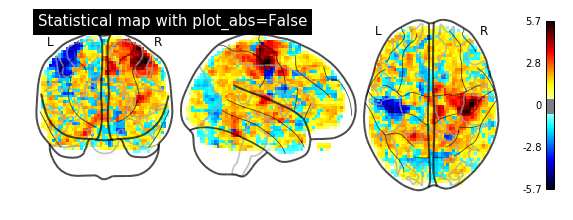

In [23]:
# Visualizing with plot_abs=False
plotting.plot_glass_brain(localizer_tmap_filename, colorbar=True,
                          plot_abs=False, title='Statistical map with plot_abs=False')

- With **negative and thresholded values.**

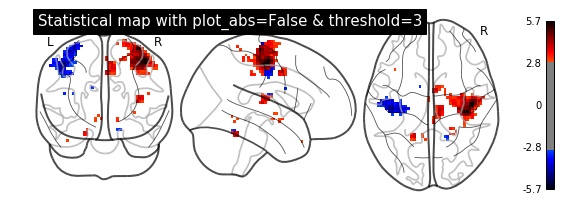

In [25]:
# Visualizing with plot_abs=False & threshold=3
plotting.plot_glass_brain(localizer_tmap_filename, threshold=3,
                          plot_abs=False, colorbar=True,
                          title='Statistical map with plot_abs=False & threshold=3')

- with a **black background.**

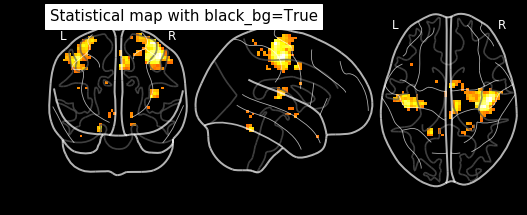

In [26]:
# Visualizing with background color to black by black_bg=True
plotting.plot_glass_brain(localizer_tmap_filename, threshold=3, black_bg=True,
                          title='Statistical map with black_bg=True')

- With **hemispheres**.

 Direction of the cuts: 
 
    'x' - sagittal, 'y' - coronal, 'z' - axial, 
    
    'l' - sagittal left hemisphere only,
    
    'r' - sagittal right hemisphere only, 
    
    Possible values are: 'ortho', 'x', 'y', 'z', 'xz', 'yx', 'yz', 'l', 'r', 'lr', 'lzr', 'lyr', lzry', 'lyrz'.

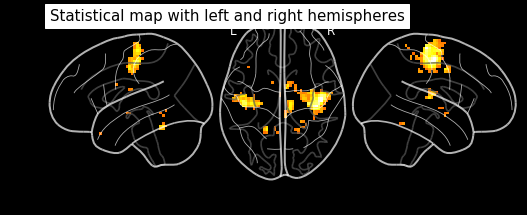

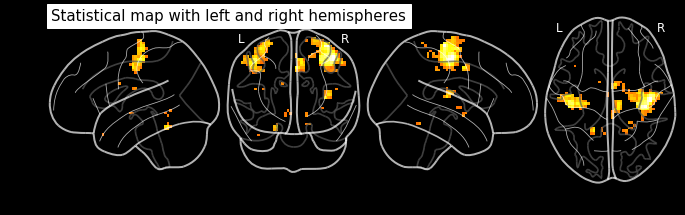

In [27]:
plotting.plot_glass_brain(localizer_tmap_filename, threshold=3, black_bg=True, display_mode="lzr",
                         title="Statistical map with left and right hemispheres")
plotting.plot_glass_brain(localizer_tmap_filename, threshold=3, black_bg=True, display_mode="lyrz",
                         title="Statistical map with left and right hemispheres")

### More notes on parameter 'plot_abs'.
By default plot_abs=True which means that maximum intensity projection of positive and negative values will be in the same manner. If plot_abs=False, then the sign of the maximum intensity will be represented with different colors as shown in 4th plot compared with the rest of the plots.

- # Plotting a 4D image  with `plot_stat_map`: ICA results

We show here, how to visualize Independent Component Analysis (ICA) results in 4D on default standard template using `plotting.plot_stat_map`.

In this use case, we make use of Nilearn function `nilearn.image.index_img` which drop downs the 4D maps image in (x, y, z, ica_map) to 3D map image (x, y, z) corresponding to 4th dimension specific ica map.

**Note:** index starts with 0 not 1. 


Dataset created in /home/darya/nilearn_data/smith_2009



Downloaded 15129514 of 15129514 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 7565016 of 7565016 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 53028809 of 53028809 bytes (100.0%,    0.0s remaining) ...done. (11 seconds, 0 min)


Downloaded 19114114 of 19114114 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 9566632 of 9566632 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 67017538 of 67017538 bytes (100.0%,    0.0s remaining) ...done. (6 seconds, 0 min)


{'bm70': '/home/darya/nilearn_data/smith_2009/bm70.nii.gz', 'rsn10': '/home/darya/nilearn_data/smith_2009/PNAS_Smith09_rsn10.nii.gz', 'bm10': '/home/darya/nilearn_data/smith_2009/PNAS_Smith09_bm10.nii.gz', 'description': "Smith 2009 Atlas\n\n\nNotes\n-----\nThis atlas provides spatial maps of the major brain networks during task-constrained brain activity and task-unconstrained (resting) brain activity.\n\nThose were derived from 6 minutes of resting-state time series from 36 subjects as well as from the from the smoothed task activity coordinates of healthy subjects stored in the BrainMap database.\n\nContent\n-------\n    :'rsn20': 20 ICA maps derived from resting-state decomposition\n    :'rsn10': 10 ICA maps from the above that matched across task and rest\n    :'rsn70': 70 ICA maps derived from resting-state decomposition\n    :'bm20': 20 ICA maps derived from decomposition BrainMap task data\n    :'bm10': 10 ICA maps from the above that matched across task and rest\n    :'bm70': 

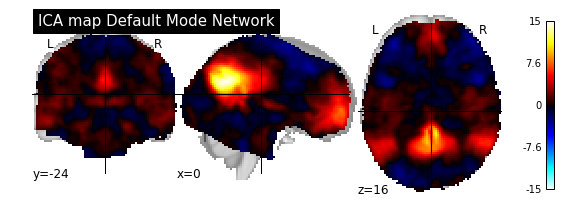

In [18]:
# Fetching ICA maps from atlas smith 2009
ica_atlas = datasets.fetch_atlas_smith_2009()
print(ica_atlas)


from nilearn.image import index_img

# Visualizing ica map of index 3
ica_maps = ica_atlas.rsn10

from nilearn._utils import check_niimg
print(check_niimg(ica_maps).shape)

ica_3 = index_img(ica_maps, 3)
plotting.plot_stat_map(ica_3, title='ICA map Default Mode Network')

Another very useful Nilearn function : **`nilearn.image.iter_img`** iterates over all ica maps in 4th dimension and visualizes 3D image for each dimension.

The trick is to use `nilearn.image.iter_img` to get **a set of 3D images from a 4D images.**

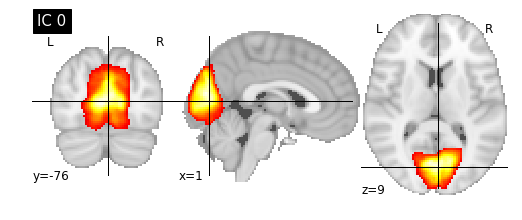

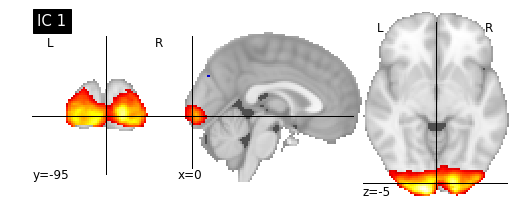

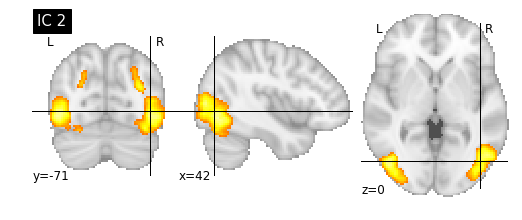

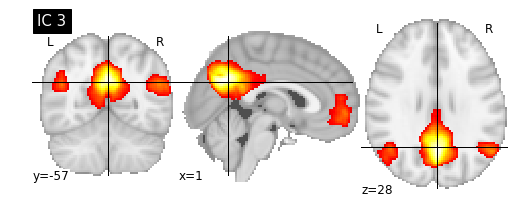

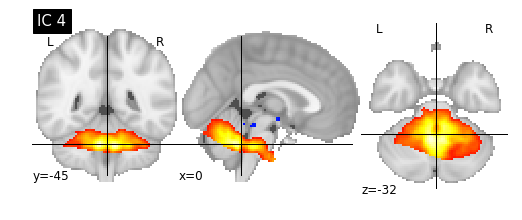

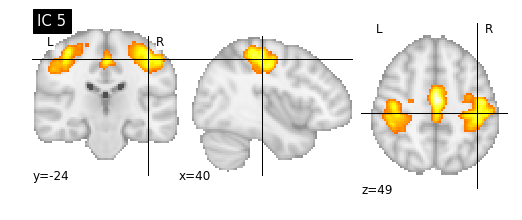

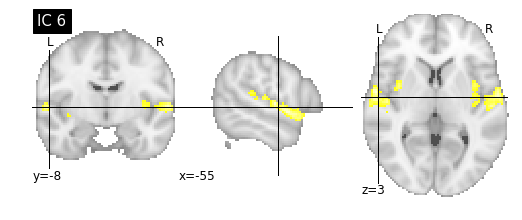

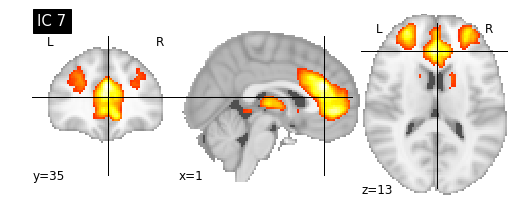

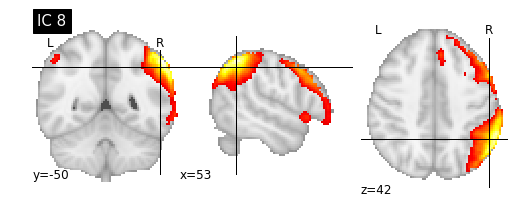

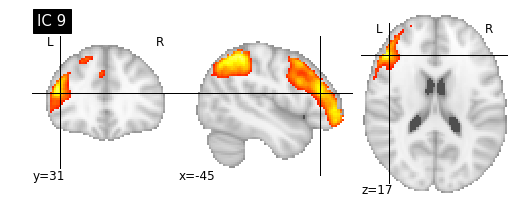

In [31]:
from nilearn.image import iter_img

# Visualizing ICA maps by iterating over 4th dimension using display_mode='z'
# and cut_coords=1 since we are choosing in only one directional mode
for i, each_map in enumerate(iter_img(ica_maps)):
    plotting.plot_stat_map(each_map, title="IC %d" % i,
                           colorbar=False, threshold=5)

- # Plotting 4D atlas maps in 4D `plot_prob_atlas`

We show here how to plot **4D atlas maps onto standard MNI template** using : `plotting.plot_prob_atlas`.

We make use of standard brain atlases available in Nilearn for easy visualization of any 4D maps (x, y, z, n_maps) **without necessarily using for loop on each 4th dimensional index**.

Three different view_types are shown here with colors automatically chosen by itself. 

### - with filled contours

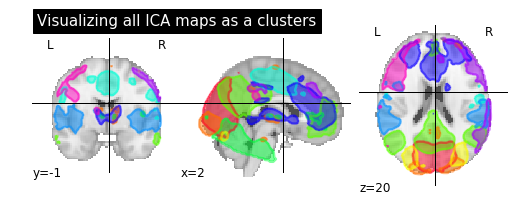

In [35]:
# Visualizing ICA maps with view_type='filled_contours'
plotting.plot_prob_atlas(maps_img=ica_maps, view_type='filled_contours',
                         title='Visualizing all ICA maps as a clusters')

### - with contours only 

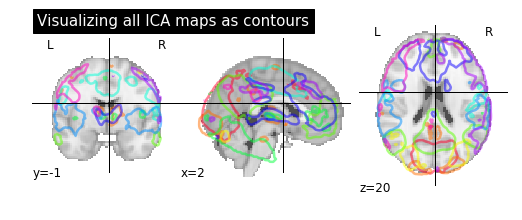

In [36]:
# Visualizing ICA maps with view_type='contours'
plotting.plot_prob_atlas(maps_img=ica_maps, view_type='contours',
                         title='Visualizing all ICA maps as contours')

### - with continuous values

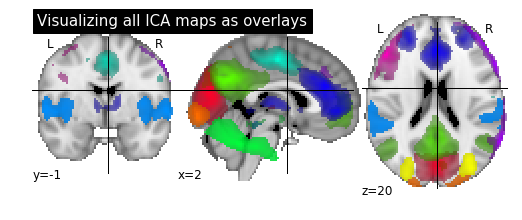

In [33]:
# Visualizing ICA maps with view_type='continuous'
plotting.plot_prob_atlas(maps_img=ica_maps, view_type='continuous',
                         title='Visualizing all ICA maps as overlays')

## Saving the results 

Image type is **guessed from the extension** given in the filename. Valid extensions
    are .png, .pdf, .svg.

In [37]:
plotting.plot_prob_atlas(maps_img=ica_maps, view_type='continuous',
                         title='Visualizing all ICA maps as overlays',
                        output_file='ica.pdf')

/home/darya/anaconda2/lib/python2.7/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


- # Plotting Region of Interest (ROI) images `plot_roi`

We show here, how to overlay ROI images or mask images onto anatomical image, using tool: `plotting.plot_roi`

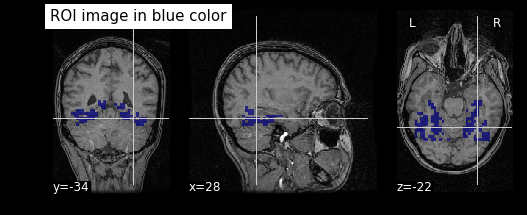

In [38]:
# We make use of previously imported subject data and loading specifically mask and anatomical filenames

# Anatomical image filename
anatomical_filename = data.anat[0]

# Mask image filename
mask_filename = data.mask_vt[0] # visual cortex mask image

# Visualizing the overlay of mask image onto its own anatomical image
plotting.plot_roi(roi_img=mask_filename, bg_img=anatomical_filename,
                  title='ROI image in blue color', dim=-1)

- # Plotting connectivity matrices `plot_connectome`

We show here, how to overlay ROI images or mask images onto anatomical image, using tool: plotting.plot_connectome

In this section, we use the connectivity matrices using kind='correlation' which are precomputed using Default Mode Network coordinates.

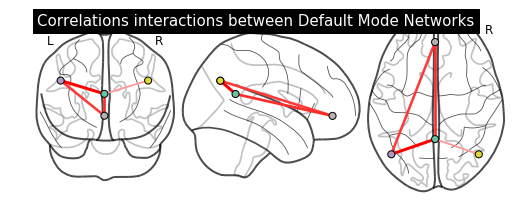

In [39]:
# Default Mode Network coordinates
dmn_coords = [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (0, 50, -5)]
labels = [
    'Posterior Cingulate Cortex',
    'Left Temporoparietal junction',
    'Right Temporoparietal junction',
    'Medial prefrontal cortex'
]

# import numpy module to fetch correlation values from csv file
import numpy as np

correlations = np.genfromtxt('corr.csv', delimiter=',', dtype=None)

# Visualization
display = plotting.plot_connectome(adjacency_matrix=correlations, node_coords=dmn_coords,
                                   edge_threshold='40%',
                                   title='Correlations interactions between Default Mode Networks')